# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Python APIs Homework
# Georgia Tech Analytics Bootcamp Fall 2021
#
# Import dependencies and setup for the script
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import json
from scipy.stats import linregress
# import citipy for based on latitude and longitude
from citipy import citipy
import datetime
today = datetime.date.today()

# Import the API Keys Google and OpenWeather (blocked w/ gitignore)
from api_keys import weather_api_key

# Output File (CSV)
output_data_file = "../output_data/cities.csv"

# Use these ranges of latitudes and longitudes
lat_range = (-90, 90)
long_range = (-180, 180)

## Generate Cities List

In [3]:
# Make the lists for holding the latitude and longitudes per cities
lat_longs = []
cities = []

# To create a list of random cities with lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
longs = np.random.uniform(long_range[0], long_range[1], size=1500)
lat_longs = zip(lats, longs)

# Find and identify nearest city for each latitude, longitude combination
for lat_long in lat_longs:
    city = citipy.nearest_city(lat_long[0], lat_long[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# CHECKPOINT: Print the city count to confirm sufficient count
print(f'There is {len(cities)} cities in the list.')
print(f'It will take {round(len(cities)/60, 2)} minutes to connect to the servers in each city.')

There is 635 cities in the list.
It will take 10.58 minutes to connect to the servers in each city.


### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [4]:
# Get the number of sets needed in the for loop
total_set_number = (len(cities) // 50) + 1

# Set up the lists which will be used to create dataframe
date = []
city = []
country = []
max_temp = []
humidity = []
lat = []
lon = []
cloudiness = []
wind_speed = []

#Add a failed counter
failed_counter = 0
url = "http://api.openweathermap.org/data/2.5/weather?appid=" + weather_api_key + "&units=metric&q="

# Gather weather information for each city
print('Getting data from site...')
print('------------------------------------------------')

# 
for set_counter in range(total_set_number):
    
    # Use try and except block: prevents the code from stopping when the set does not have 50 records
    try:    
        
        # For each record, OpenWeather API will pull the information and append to corresponding lists
        for record_counter in range(50):
            
            # Apply a counter to show the actual index the city is in the cities list 
            counter = set_counter * 50 + record_counter
            
            # CHECKPOINT
            # Print the current set and record index
            print(f'Processing Record {record_counter + 1} of Set {set_counter + 1} | {cities[counter]}')

            # Use try and except block: prevents the code from stopping when a city cannot be found
            try:
                
                # Get the query url and make a call
                query_url = url + cities[counter]
                weather_json = requests.get(query_url, time.sleep(1)).json()
                
             
                # Append to lists
                date.append(weather_json["dt"])
                city.append(cities[counter])
                country.append(weather_json["sys"]["country"])
                max_temp.append(weather_json["main"]["temp_max"])
                humidity.append(weather_json["main"]["humidity"])
                lat.append(weather_json["coord"]["lat"])
                lon.append(weather_json["coord"]["lon"])             
                cloudiness.append(weather_json["clouds"]["all"])
                wind_speed.append(weather_json["wind"]["speed"])
                              
                         
            # If the city is not found, print it out, and increment to the failed counter
            except KeyError:

                print('Oops!! The city not found. Skipping it...')
                failed_counter += 1
            
            # (For testing)If any other error, print it out
            except:
                
                print('Oh no! Unexpected Error')
    
    # Break out from the loop once the IndexError was found
    except IndexError:
        
        break
        
# Print out the number of cities found and not found
print('-----------------------------')
print(f'There are {failed_counter} cities not found. {len(cities) - failed_counter} cities in dataframe.')
print('The data has processed, complete.')      
print('-----------------------------')

Getting data from site...
------------------------------------------------
Processing Record 1 of Set 1 | jamestown
Processing Record 2 of Set 1 | xam nua
Processing Record 3 of Set 1 | mizusawa
Processing Record 4 of Set 1 | rikitea
Processing Record 5 of Set 1 | dikson
Processing Record 6 of Set 1 | ayan
Processing Record 7 of Set 1 | punta arenas
Processing Record 8 of Set 1 | hilo
Processing Record 9 of Set 1 | barentsburg
Oops!! The city not found. Skipping it...
Processing Record 10 of Set 1 | qaanaaq
Processing Record 11 of Set 1 | ribeira grande
Processing Record 12 of Set 1 | thompson
Processing Record 13 of Set 1 | sault sainte marie
Processing Record 14 of Set 1 | angoche
Processing Record 15 of Set 1 | longlac
Oops!! The city not found. Skipping it...
Processing Record 16 of Set 1 | pozo colorado
Processing Record 17 of Set 1 | honiara
Processing Record 18 of Set 1 | maroua
Processing Record 19 of Set 1 | gambela
Processing Record 20 of Set 1 | waingapu
Processing Record 21

Oops!! The city not found. Skipping it...
Processing Record 33 of Set 4 | capoterra
Processing Record 34 of Set 4 | were ilu
Processing Record 35 of Set 4 | kapaa
Processing Record 36 of Set 4 | mfou
Processing Record 37 of Set 4 | kenai
Processing Record 38 of Set 4 | kuzovatovo
Processing Record 39 of Set 4 | sitka
Processing Record 40 of Set 4 | saleaula
Oops!! The city not found. Skipping it...
Processing Record 41 of Set 4 | neepawa
Processing Record 42 of Set 4 | hamilton
Processing Record 43 of Set 4 | okhotsk
Processing Record 44 of Set 4 | vaimela
Oops!! The city not found. Skipping it...
Processing Record 45 of Set 4 | kasama
Processing Record 46 of Set 4 | kutum
Processing Record 47 of Set 4 | cherskiy
Processing Record 48 of Set 4 | sinnamary
Processing Record 49 of Set 4 | pochutla
Processing Record 50 of Set 4 | victoria
Processing Record 1 of Set 5 | canoas
Processing Record 2 of Set 5 | maputo
Processing Record 3 of Set 5 | biltine
Processing Record 4 of Set 5 | polson


Oops!! The city not found. Skipping it...
Processing Record 18 of Set 8 | saldanha
Processing Record 19 of Set 8 | ust-koksa
Processing Record 20 of Set 8 | mabaruma
Processing Record 21 of Set 8 | mandalgovi
Processing Record 22 of Set 8 | morros
Processing Record 23 of Set 8 | te anau
Processing Record 24 of Set 8 | meulaboh
Processing Record 25 of Set 8 | ryki
Processing Record 26 of Set 8 | bubaque
Processing Record 27 of Set 8 | praia
Processing Record 28 of Set 8 | tilichiki
Processing Record 29 of Set 8 | maragogi
Processing Record 30 of Set 8 | grand river south east
Oops!! The city not found. Skipping it...
Processing Record 31 of Set 8 | ca mau
Processing Record 32 of Set 8 | chenzhou
Processing Record 33 of Set 8 | saint-joseph
Processing Record 34 of Set 8 | burlington
Processing Record 35 of Set 8 | jabiru
Oops!! The city not found. Skipping it...
Processing Record 36 of Set 8 | sangar
Processing Record 37 of Set 8 | merauke
Processing Record 38 of Set 8 | hazorasp
Process

Processing Record 49 of Set 11 | aktau
Processing Record 50 of Set 11 | nemuro
Processing Record 1 of Set 12 | ust-maya
Processing Record 2 of Set 12 | yaan
Processing Record 3 of Set 12 | yumen
Processing Record 4 of Set 12 | dunedin
Processing Record 5 of Set 12 | prabumulih
Processing Record 6 of Set 12 | bell ville
Processing Record 7 of Set 12 | kousseri
Processing Record 8 of Set 12 | umm lajj
Processing Record 9 of Set 12 | daru
Processing Record 10 of Set 12 | aasiaat
Processing Record 11 of Set 12 | kupang
Processing Record 12 of Set 12 | bandarbeyla
Processing Record 13 of Set 12 | chifeng
Processing Record 14 of Set 12 | tadine
Processing Record 15 of Set 12 | linxia
Processing Record 16 of Set 12 | mahadday weyne
Oops!! The city not found. Skipping it...
Processing Record 17 of Set 12 | antequera
Processing Record 18 of Set 12 | mubi
Processing Record 19 of Set 12 | komsomolskiy
Processing Record 20 of Set 12 | kerteh
Oops!! The city not found. Skipping it...
Processing Rec

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [5]:
# Create a DataFrame with the city information for below paramaters
city_dict = {'City': city,
             'Latitude': lat,
             'Longitude': lon,
             'Max Temperature': max_temp,
             'Humidity (%)': humidity,
             'Cloudiness (%)': cloudiness,
             'Wind Speed (MPH)': wind_speed,
             'Country': country,
             'Date': date
            }
city_df = pd.DataFrame(city_dict)

# Import the DataFrame into the CSV file
csv_path = '../output_data/cities.csv'
city_df.to_csv(csv_path)

# Display DataFrame
city_df

,City,Latitude,Longitude,Max Temperature,Humidity (%),Cloudiness (%),Wind Speed (MPH),Country,Date
0,jamestown,42.0970,-79.2353,25.05,53,75,4.63,US,1627062319
1,xam nua,20.4197,104.0439,20.49,100,100,0.80,LA,1627062578
2,mizusawa,39.1333,141.1333,21.14,98,42,0.71,JP,1627062580
3,rikitea,-23.1203,-134.9692,22.04,74,73,7.99,PF,1627062581
4,dikson,73.5069,80.5464,7.04,68,41,4.76,RU,1627062415
...,...,...,...,...,...,...,...,...,...
575,ritchie,-29.0380,24.6028,5.07,34,0,4.98,ZA,1627063362
576,klaksvik,62.2266,-6.5890,11.51,88,99,8.17,FO,1627063363
577,castelldefels,41.2779,1.9703,32.82,69,0,2.68,ES,1627063364
578,zhuhai,22.2769,113.5678,30.59,84,20,3.09,CN,1627063244


In [6]:
# Provide statistical analysis on the DataFrame
city_df.describe()

,Latitude,Longitude,Max Temperature,Humidity (%),Cloudiness (%),Wind Speed (MPH),Date
count,580.000000,580.000000,580.000000,580.000000,580.000000,580.000000,5.800000e+02
mean,20.202098,21.824590,21.634690,68.413793,54.889655,3.660966,1.627063e+09
std,33.290375,90.135706,8.064282,21.977013,37.101386,2.779292,2.757563e+02
min,-54.800000,-179.166700,2.260000,3.000000,0.000000,0.000000,1.627062e+09
25%,-8.757175,-57.977150,15.512500,54.000000,20.000000,1.750000,1.627063e+09
50%,24.505750,25.562600,23.240000,73.000000,61.000000,3.070000,1.627063e+09
75%,49.064250,103.980975,27.312500,86.000000,90.000000,4.832500,1.627063e+09
max,78.218600,178.416700,39.690000,100.000000,100.000000,24.520000,1.627063e+09


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [15]:
# Drop the rows of data that have a humidity higher than 100%
cleaned_cities_df = city_df.loc[city_df['Humidity (%)'] <= 100]
cleaned_cities_df

,City,Latitude,Longitude,Max Temperature,Humidity (%),Cloudiness (%),Wind Speed (MPH),Country,Date
0,jamestown,42.0970,-79.2353,25.05,53,75,4.63,US,1627062319
1,xam nua,20.4197,104.0439,20.49,100,100,0.80,LA,1627062578
2,mizusawa,39.1333,141.1333,21.14,98,42,0.71,JP,1627062580
3,rikitea,-23.1203,-134.9692,22.04,74,73,7.99,PF,1627062581
4,dikson,73.5069,80.5464,7.04,68,41,4.76,RU,1627062415
...,...,...,...,...,...,...,...,...,...
575,ritchie,-29.0380,24.6028,5.07,34,0,4.98,ZA,1627063362
576,klaksvik,62.2266,-6.5890,11.51,88,99,8.17,FO,1627063363
577,castelldefels,41.2779,1.9703,32.82,69,0,2.68,ES,1627063364
578,zhuhai,22.2769,113.5678,30.59,84,20,3.09,CN,1627063244


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

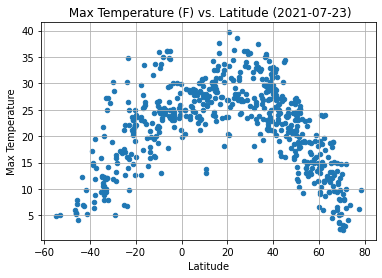

In [17]:
# Scatter Plot: Latitude and Max Temperature 
# Include Title and Date
cleaned_cities_df.plot(kind='scatter', x='Latitude', y='Max Temperature', 
                       title=f' Max Temperature (F) vs. Latitude ({today})')
plt.grid()
plt.savefig('../output_data/Latitude_MaxTemperature_Plot.png')

## Latitude vs. Humidity Plot

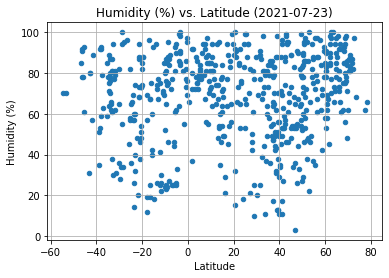

In [18]:
# Scatter PLot: Latitude and Humidity
# Include the date in title
cleaned_cities_df.plot(kind='scatter', x='Latitude', y='Humidity (%)', 
                       title=f'Humidity (%) vs. Latitude ({today})')
plt.grid()
plt.savefig('../output_data/Latitude_Humidity_Plot.png')

## Latitude vs. Cloudiness Plot

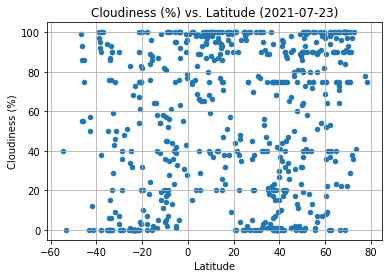

In [19]:
# Scatter Plot Latitude and Cloudiness
# Include the date in title 
cleaned_cities_df.plot(kind='scatter', x='Latitude', y='Cloudiness (%)', 
                       title=f'Cloudiness (%) vs. Latitude ({today})')
plt.grid()
plt.savefig('../output_data/Latitude_Cloudiness_Plot.png')

## Latitude vs. Wind Speed Plot

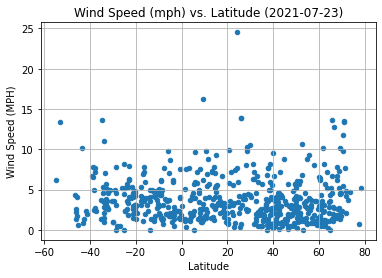

In [20]:
# Scatter Plot Latitude and Wind Speed
# Include the date in title 
cleaned_cities_df.plot(kind='scatter', x='Latitude', y='Wind Speed (MPH)', 
                       title=f'Wind Speed (mph) vs. Latitude ({today})')
plt.grid()
plt.savefig('../output_data/Latitude_WindSpeed_Plot.png')

## Linear Regression

In [21]:
# Create two DataFrame's determined by the latitude
north_cities_df = cleaned_cities_df.loc[cleaned_cities_df['Latitude'] >= 0]
south_cities_df = cleaned_cities_df.loc[cleaned_cities_df['Latitude'] < 0]

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is 0.4936866017395004
The linear regression model is y = -0.28x + 33.58


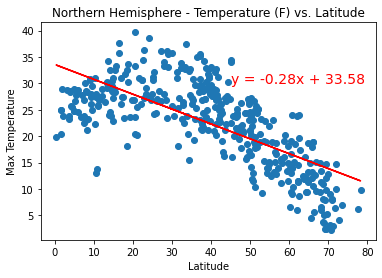

In [23]:
# Linear Regression Plot:  Latitude and Max temperature in the Northern Hemisphere
north_cities_df.plot(kind='scatter', x='Latitude', y='Max Temperature', title='Northern Hemisphere - Temperature (F) vs. Latitude')

# Find the linear regression model and print it to the scatter plot
(slope, intercept, rvalue, pvalue, stderr) = linregress(north_cities_df['Latitude'], north_cities_df['Max Temperature'])
regress_values = north_cities_df['Latitude'] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(north_cities_df['Latitude'], north_cities_df['Max Temperature'])
plt.plot(north_cities_df['Latitude'],regress_values,"r-")
plt.annotate(line_eq, (45, 30),fontsize=14,color="red")

print(f'The r-squared is {rvalue**2}')
print(f'The linear regression model is {line_eq}')

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is 0.5413831718521845
The linear regression model is y = 0.45x + 28.98


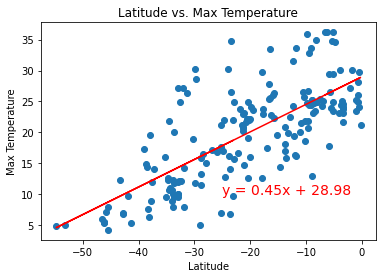

In [26]:
# Linear Regression Plot:  Latitude and Max Temperature in the Southern Hemisphere
south_cities_df.plot(kind='scatter', x='Latitude', y='Max Temperature', title='Latitude vs. Max Temperature')

# Find the linear regression model and print it to the scatter plot
(slope, intercept, rvalue, pvalue, stderr) = linregress(south_cities_df['Latitude'], south_cities_df['Max Temperature'])
regress_values = south_cities_df['Latitude'] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(south_cities_df['Latitude'], south_cities_df['Max Temperature'])
plt.plot(south_cities_df['Latitude'],regress_values,"r-")
plt.annotate(line_eq,(-25,10),fontsize=14,color="red")

print(f'The r-squared is {rvalue**2}')
print(f'The linear regression model is {line_eq}')

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is 0.004243809290551035
The linear regression model is y = 0.07x + 67.05


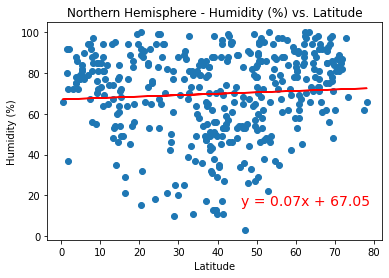

In [27]:
# Linear Regression Plot: Latitude and Humidity in the Northern Hemisphere
north_cities_df.plot(kind='scatter', x='Latitude', y='Humidity (%)', title='Northern Hemisphere - Humidity (%) vs. Latitude')

# Find the linear regression model and print it to the scatter plot
(slope, intercept, rvalue, pvalue, stderr) = linregress(north_cities_df['Latitude'], north_cities_df['Humidity (%)'])
regress_values = north_cities_df['Latitude'] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(north_cities_df['Latitude'], north_cities_df['Humidity (%)'])
plt.plot(north_cities_df['Latitude'],regress_values,"r-")
plt.annotate(line_eq,(46,15),fontsize=14,color="red")

print(f'The r-squared is {rvalue**2}')
print(f'The linear regression model is {line_eq}')

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is 0.0018754250938396576
The linear regression model is y = -0.08x + 63.9


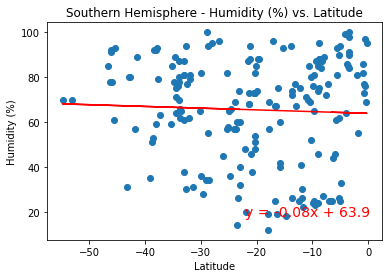

In [28]:
# Linear Regression Plot: Latitude and Humidity in the Southern Hemisphere
south_cities_df.plot(kind='scatter', x='Latitude', y='Humidity (%)', title='Southern Hemisphere - Humidity (%) vs. Latitude')

# Find the linear regression model and print it to the scatter plot
(slope, intercept, rvalue, pvalue, stderr) = linregress(south_cities_df['Latitude'], south_cities_df['Humidity (%)'])
regress_values = south_cities_df['Latitude'] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(south_cities_df['Latitude'], south_cities_df['Humidity (%)'])
plt.plot(south_cities_df['Latitude'],regress_values,"r-")
plt.annotate(line_eq,(-22,18),fontsize=14,color="red")

print(f'The r-squared is {rvalue**2}')
print(f'The linear regression model is {line_eq}')

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is 0.0013170741629015823
The linear regression model is y = -0.07x + 61.53


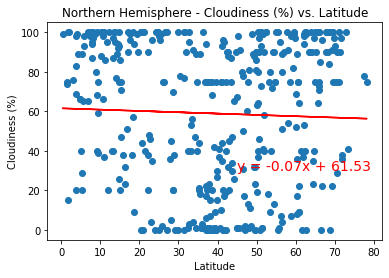

In [29]:
# Linear Regression Plot: Latitude and Cloudiness in the Northern Hemisphere
north_cities_df.plot(kind='scatter', x='Latitude', y='Cloudiness (%)', title='Northern Hemisphere - Cloudiness (%) vs. Latitude')

# Find the linear regression model and print it to the scatter plot
(slope, intercept, rvalue, pvalue, stderr) = linregress(north_cities_df['Latitude'], north_cities_df['Cloudiness (%)'])
regress_values = north_cities_df['Latitude'] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(north_cities_df['Latitude'], north_cities_df['Cloudiness (%)'])
plt.plot(north_cities_df['Latitude'],regress_values,"r-")
plt.annotate(line_eq,(45,30),fontsize=14,color="red")

print(f'The r-squared is {rvalue**2}')
print(f'The linear regression model is {line_eq}')

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is 0.006833333043644595
The linear regression model is y = 0.23x + 51.09


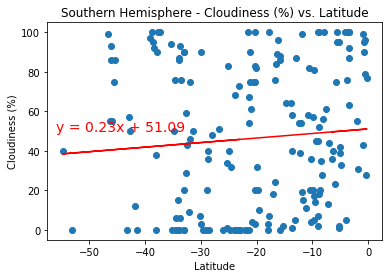

In [30]:
# Linear Regression Plot: Latitude and Cloudiness in the Southern Hemisphere
south_cities_df.plot(kind='scatter', x='Latitude', y='Cloudiness (%)', title='Southern Hemisphere - Cloudiness (%) vs. Latitude')

# Find the linear regression model and print it to the scatter plot
(slope, intercept, rvalue, pvalue, stderr) = linregress(south_cities_df['Latitude'], south_cities_df['Cloudiness (%)'])
regress_values = south_cities_df['Latitude'] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(south_cities_df['Latitude'], south_cities_df['Cloudiness (%)'])
plt.plot(south_cities_df['Latitude'],regress_values,"r-")
plt.annotate(line_eq,(-56,50),fontsize=14,color="red")

print(f'The r-squared is {rvalue**2}')
print(f'The linear regression model is {line_eq}')

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is 0.001648202377474746
The linear regression model is y = -0.01x + 3.87


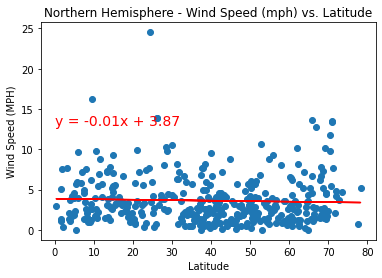

In [31]:
# Linear Regression Plot: Latitude and Wind Speed in the Northern Hemisphere
north_cities_df.plot(kind='scatter', x='Latitude', y='Wind Speed (MPH)', title='Northern Hemisphere - Wind Speed (mph) vs. Latitude')

# Find the linear regression model and print it to the scatter plot
(slope, intercept, rvalue, pvalue, stderr) = linregress(north_cities_df['Latitude'], north_cities_df['Wind Speed (MPH)'])
regress_values = north_cities_df['Latitude'] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(north_cities_df['Latitude'], north_cities_df['Wind Speed (MPH)'])
plt.plot(north_cities_df['Latitude'],regress_values,"r-")
plt.annotate(line_eq,(0,13),fontsize=14,color="red")

print(f'The r-squared is {rvalue**2}')
print(f'The linear regression model is {line_eq}')

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is 0.024695440365999834
The linear regression model is y = -0.03x + 3.14


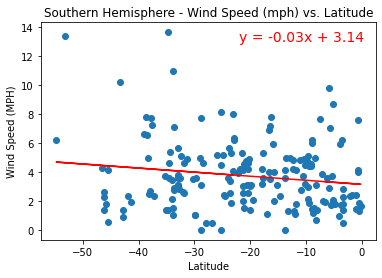

In [32]:
# Linear Regression Plot: Latitude and Wind Speed in the Southern Hemisphere
south_cities_df.plot(kind='scatter', x='Latitude', y='Wind Speed (MPH)', title='Southern Hemisphere - Wind Speed (mph) vs. Latitude')

# Find the linear regression model and print it to the scatter plot
(slope, intercept, rvalue, pvalue, stderr) = linregress(south_cities_df['Latitude'], south_cities_df['Wind Speed (MPH)'])
regress_values = south_cities_df['Latitude'] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(south_cities_df['Latitude'], south_cities_df['Wind Speed (MPH)'])
plt.plot(south_cities_df['Latitude'],regress_values,"r-")
plt.annotate(line_eq,(-22,13),fontsize=14,color="red")

print(f'The r-squared is {rvalue**2}')
print(f'The linear regression model is {line_eq}')